## 15.1머신러닝 모델 개요

### 1.머신러닝이란?

- 예측변수(피처값)-> 다양한머신러닝모델(이진분류,의사결정트리,회귀모델,등등) -> 타겟변수(레이블값)

### 2.머신러닝은 데이터분석의 과정에서 어느 부분에서 쓰일까?

- 데이터 전처리 및 탐색
    - 결측값 처리, 이상치 탐지, 데이터 스케일링, 특성 추출 및 선택 등의 작업에서 머신러닝 알고리즘이 적용
- 모델 학습
    - 다양한 머신러닝 알고리즘(모델)을 사용하여 피처들과 목표 변수(레이블값) 간의 관계를 모델링하고 학습
- 모델 평가 및 검증
    - 학습된 모델의 성능을 평가하고 검증하는 데 머신러닝 알고리즘이 사용된다. ex) cross validation(), predict() 등등
- 예측 및 추론
    - 학습된 모델을 사용하여 새로운 데이터에 대한 예측을 수행(새로운 예측변수값으로 미리 학습된 모델에대한 예측값(타겟변수) 예측)
- 모델 개선 및 최적화
    - 모델의 성능을 향상시키기 위해 머신러닝 기술이 사용 -> 하이퍼파라미터 튜닝, 앙상블 학습, feature engineering 등등
    

---------------
## 15.2 소득예측모델 만들기

### 1. 데이터 전처리

- a.15개의 변수들중, income변수를 레이블 변수, 나머지 14개 변수를 피처변수로 select

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('../Data/adult.csv')
df.info(max_cols=np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- b. 결측지가 없으므로, 결측지 처리는 해줄필요 없고, 이후 변수 전처리과정들을 거친다
    - 타겟변수 전처리
    - 불필요 변수 삭제 및 전처리
    - 데이터 인코딩
    - 예측변수 전처리
    - 타겟변수와 예측변수들을 따로 분리저장(나중에 모델에 집어넣는 곳이 다르기 때문)

- 타겟변수 전처리

In [2]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [3]:
import numpy as np
df['income']=np.where(df['income']=='>50K','high','low')
df['income'].value_counts(normalize=True)

low     0.760718
high    0.239282
Name: income, dtype: float64

- 불필요한 변수 삭제 및 전처리

**주로 이름,아이디,주소 등의 변수는 데이터로 저장될때 고유 식별 번호로 저장되거나,  반복되는 패턴등이 없으므로 타겟변수와도 연관될 가능성이 적기때문에 학습의 효율성을 위해서 제거해주는 편이다**

In [4]:
df.drop(columns='fnlwgt',inplace=True)

- 데이터 인코딩 및 예측변수 전처리

**문자열 피처를 숫자형으로 인코딩 함으로써, 학습 에러가 나지 않게 하고, 학습의 효율성을 높인다. 레이블 인코딩//원핫 인코딩이 있다**

**머신러닝에 활용되는 변수들은 전부 숫자 자료형이여야 한다 => 전처리 과정중 인코딩이 중요한 이유**

> get_dummies() => 존재하는 object 타입의 값을 숫자형으로 가변수 처리 >>> 컬럼이 늘어남

[일반적으로는 타겟형변수까지 인코딩을 해줘야한다]

In [5]:
target_y=df['income']
features_x=df.drop(columns='income')
features_x=pd.get_dummies(features_x)
features_x.info(max_cols=np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 107 columns):
 #    Column                                     Non-Null Count  Dtype
---   ------                                     --------------  -----
 0    age                                        48842 non-null  int64
 1    education_num                              48842 non-null  int64
 2    capital_gain                               48842 non-null  int64
 3    capital_loss                               48842 non-null  int64
 4    hours_per_week                             48842 non-null  int64
 5    workclass_?                                48842 non-null  uint8
 6    workclass_Federal-gov                      48842 non-null  uint8
 7    workclass_Local-gov                        48842 non-null  uint8
 8    workclass_Never-worked                     48842 non-null  uint8
 9    workclass_Private                          48842 non-null  uint8
 10   workclass_Self-emp-inc          

- 학습용,테스트용 피처 레이블 데이터셋 split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(features_x, target_y, \
                                                  test_size=0.3, random_state=11)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34189, 107) (14653, 107) (34189,) (14653,)


-------------
### 2.모델 import

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=11,
                                max_depth=3)

In [8]:
from sklearn.metrics import accuracy_score
dt_clf.fit(X_train , y_train)


DecisionTreeClassifier(max_depth=3, random_state=11)

- 트리 시각화 graphviz 툴사용

In [9]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=['high','low'] , \
feature_names = features_x.columns, impurity=True, filled=True)

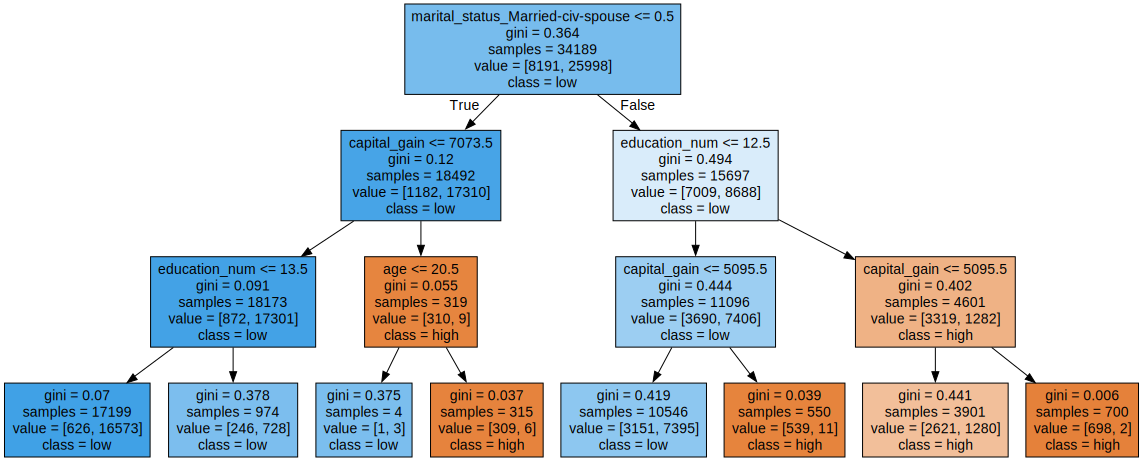

In [10]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**추가적으로 의사결정트리를 주로 사용하는 이유가 분류의 이유도 있지만, 피처 중요도를 측정하는데도 있기때문에 간단하게 추출**

Feature importances:
[0.001 0.227 0.244 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.528 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
age : 0.001
education_num : 0.227
capital_gain : 0.244
capital_loss : 0.000
hours_per_week : 0.000
workclass_? : 0.000
workclass_Federal-gov : 0.000
workclass_Local-gov : 0.000
workclass_Never-worked : 0.000
workclass_Private : 0.000
workclass_Self-emp-inc : 0.000
workclass_Self-emp-not-inc : 0.000
workclass_State-gov : 0.000
workclass_Without-pay :

<AxesSubplot:>

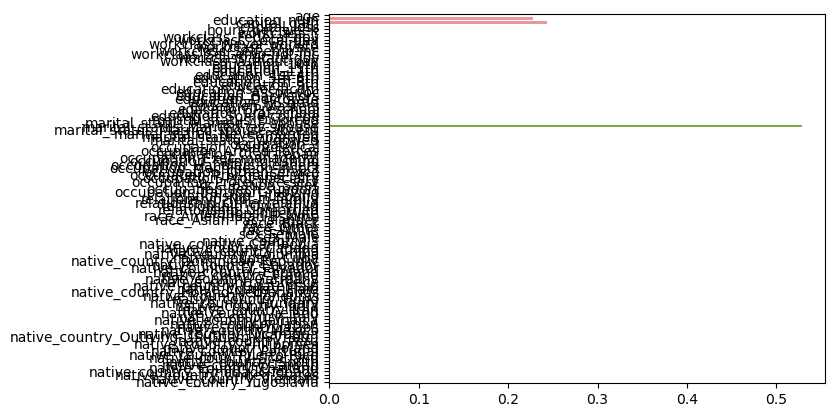

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(features_x.columns , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=features_x.columns)

--------------
### 3.테스트 데이터의 타겟값 예측하기

- 정확도 스코어로 계산 => 대략 10000개중 8439개의 타겟값을 맞춤

In [12]:
dt_pred = dt_clf.predict(X_test)
print(dt_pred) #테스트 데이터에 대한 예측 결과값
print(type(dt_pred)) #타입은 ndarray
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

['high' 'low' 'high' ... 'low' 'low' 'low']
<class 'numpy.ndarray'>
DecisionTreeClassifier 정확도: 0.8439


-----------------
### 4.모델 성능 종합평가

- 성능평가
    - predicted label 혼동행렬만들기
    - 성능평가 지표
        - accuracy_score
        - precision_score
        - recall_score
        - F1 score

- 혼동행렬 만들기


In [13]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = y_test,  # 실제값
                            y_pred = dt_pred,    # 예측값
                            labels = ['high', 'low'])    # 클래스 배치 순서
conf_mat

array([[ 1814,  1682],
       [  605, 10552]], dtype=int64)

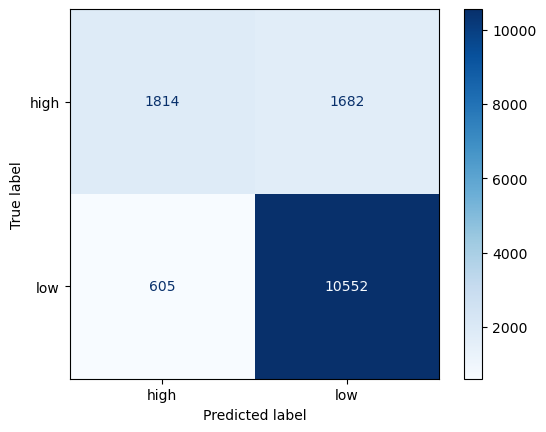

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,       # 컨퓨전 매트릭스
                           display_labels = ('high', 'low'))  # 타겟 변수 클래스명

p.plot(cmap = 'Blues')                                        # 컬러맵 적용해 출력

- 성능 평가 지표 구하기

In [15]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true = y_test,  # 실제값
                       y_pred = dt_pred)    # 예측값

0.8439227461953184

In [17]:
import sklearn.metrics as metrics
metrics.precision_score(y_true = y_test,  # 실제값
                       y_pred = dt_pred,  # 예측값
                       pos_label='high')   # 특정관심클래스

0.749896651508888

In [18]:
import sklearn.metrics as metrics
metrics.recall_score(y_true = y_test,  # 실제값
                       y_pred = dt_pred,  # 예측값
                       pos_label='high')   # 특정관심클래스

0.5188787185354691

In [19]:
import sklearn.metrics as metrics
metrics.f1_score(y_true = y_test,  # 실제값
                       y_pred = dt_pred,  # 예측값
                       pos_label='high')   # 특정관심클래스

0.6133558748943363